In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
from CVAE import *
from helper import OHE

In [6]:
### SETTING OF MODEL/TRAINING PARAMETERS

layer_structure = [784, 300, 50, 10, 2]

# we flatten the MNIST images
input_dim = 784 

# we perform OHE on the numbers
conditional_vector_dim = 11 

# minibatch size for training
minibatch_size = 256

# no. of epochs for training
n_iter = 40

In [7]:
### DEFINE DATALOADER

train_loader = torch.utils.data.DataLoader(
torchvision.datasets.MNIST('./data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                (0.1307,), (0.3081,))
                             ])),
batch_size=minibatch_size, shuffle=True)



In [8]:
model = CVAE(torch.tensor(layer_structure), input_dim, conditional_vector_dim)
model.initialise_model()
model.train(n_iter = n_iter, train_loader=train_loader)

In [10]:
# generate and visualise samples: 
## specify the integer to generate, alongside the angle of rotation in [-1, 1] (to be multiplied
## by 45)

examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)


conditional_vector = torch.tensor(OHE(example_targets.numpy()))
normalised_rotation = np.random.uniform(low=-1, high=1, size=(len(conditional_vector), 1))
conditional_vector = torch.concat([conditional_vector, torch.tensor(normalised_rotation)], axis=1)
conditional_vector = conditional_vector.type(torch.float)



example_data = rotate_images(example_data, normalised_rotation)
example_data = example_data.flatten(start_dim=1)


samples = model.generate_samples(torch.tensor(conditional_vector))
samples = samples.reshape((minibatch_size, 28, 28))


/var/folders/n5/t72v72dd767fqh385sx1j7mm0000gn/T/ipykernel_4985/664582496.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  samples = model.generate_samples(torch.tensor(conditional_vector))


tensor(5)
tensor(-22.6527)


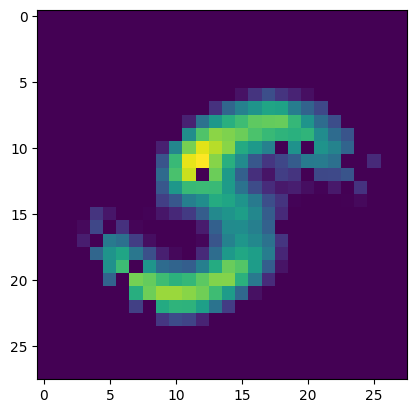

---
tensor(1)
tensor(2.3397)


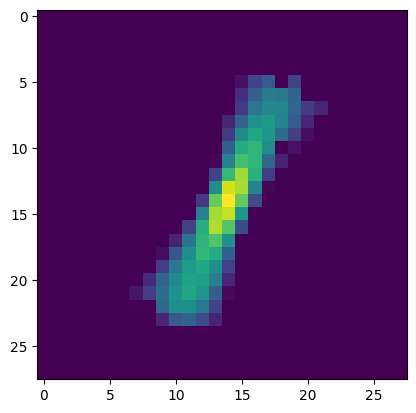

---
tensor(3)
tensor(39.5794)


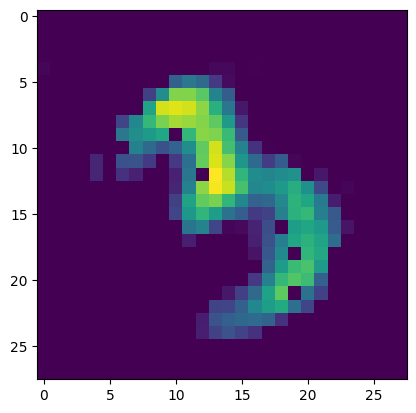

---
tensor(5)
tensor(42.6869)


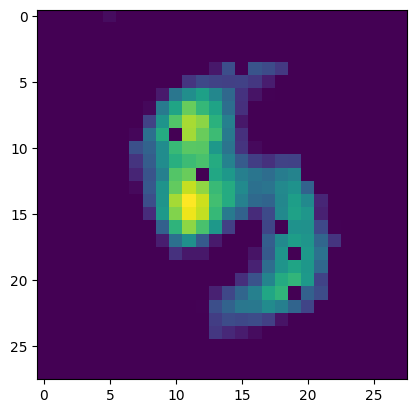

---
tensor(4)
tensor(8.5587)


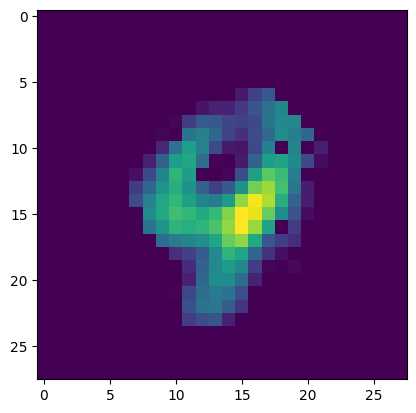

---
tensor(3)
tensor(-26.1634)


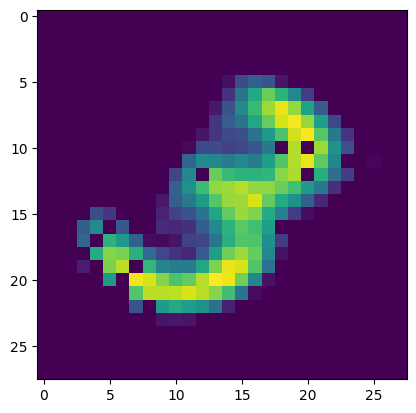

---
tensor(9)
tensor(-42.5883)


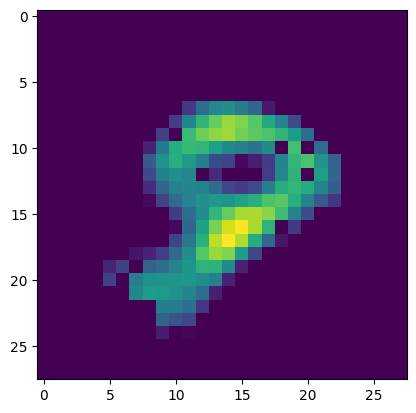

---
tensor(1)
tensor(31.8186)


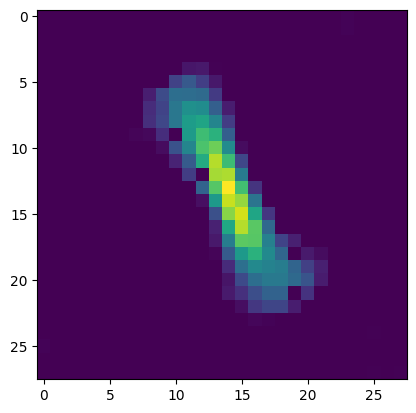

---
tensor(9)
tensor(7.3205)


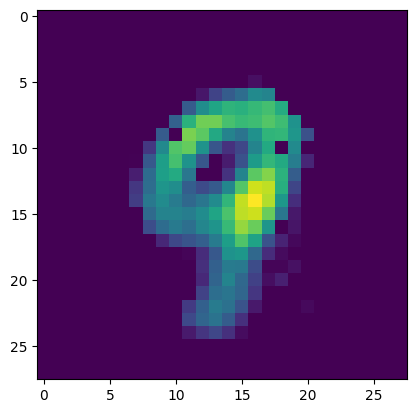

---
tensor(7)
tensor(-33.2958)


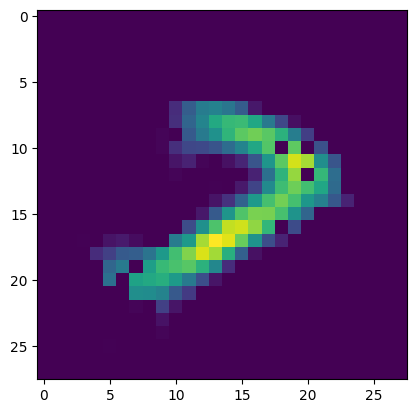

---
tensor(1)
tensor(17.5635)


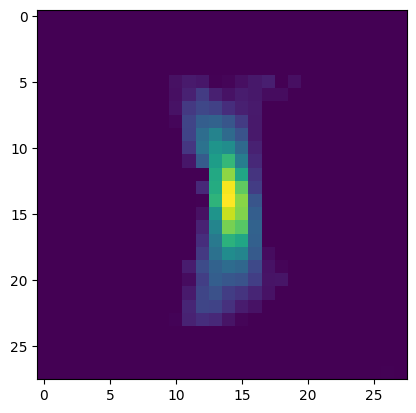

---
tensor(3)
tensor(-43.4293)


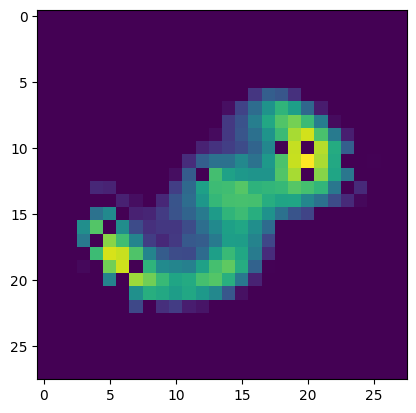

---
tensor(8)
tensor(-13.9109)


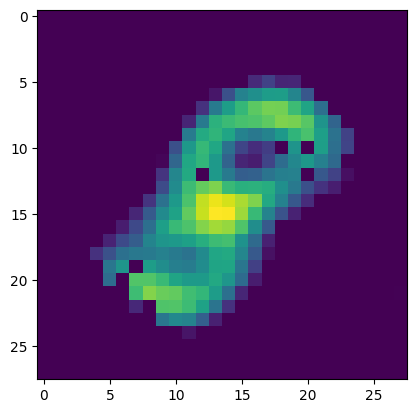

---
tensor(5)
tensor(-43.1914)


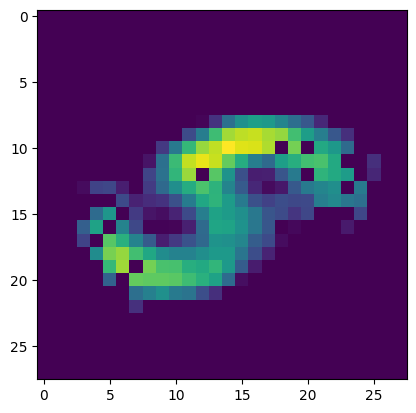

---
tensor(0)
tensor(4.0092)


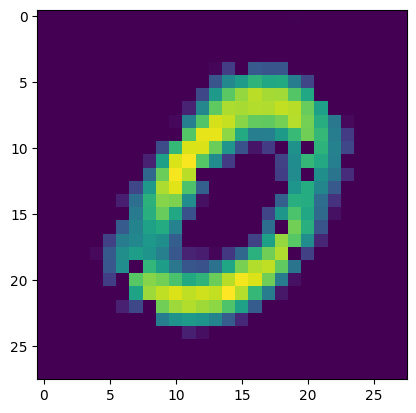

---
tensor(9)
tensor(-7.2625)


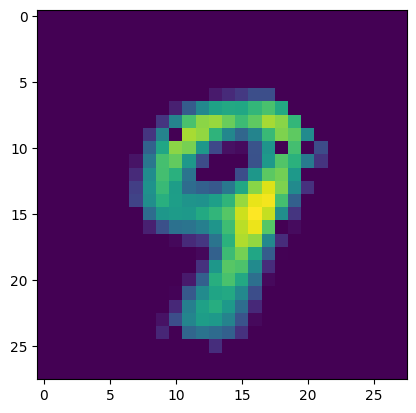

---
tensor(8)
tensor(23.2910)


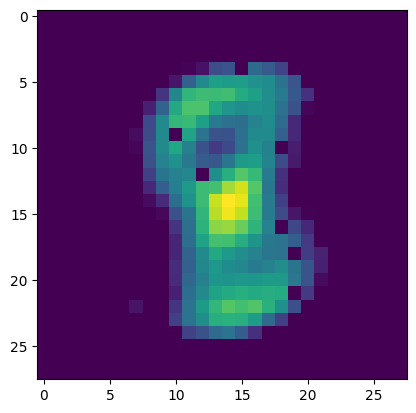

---
tensor(3)
tensor(27.6029)


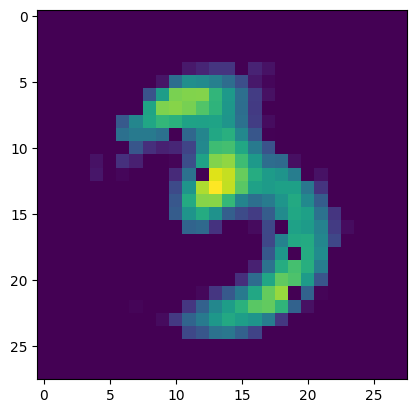

---
tensor(1)
tensor(40.8970)


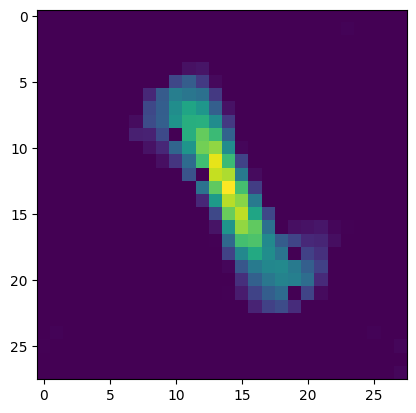

---
tensor(7)
tensor(-3.8225)


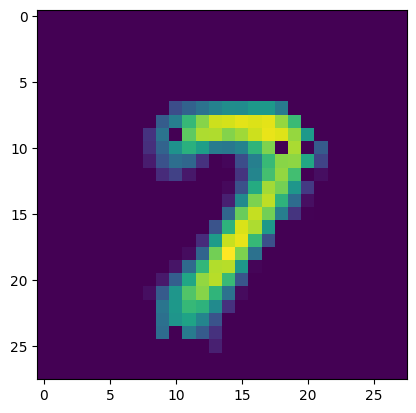

---
tensor(1)
tensor(5.4125)


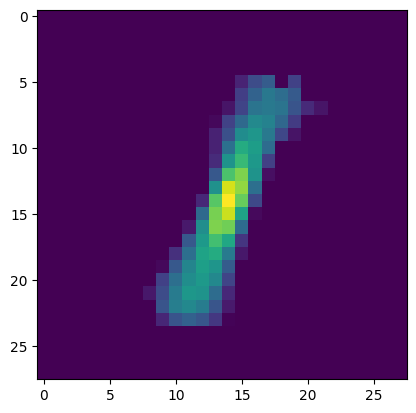

---
tensor(2)
tensor(-40.6727)


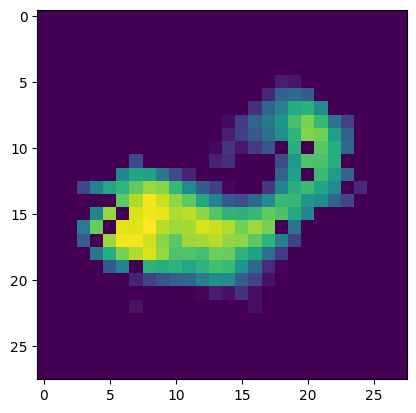

---
tensor(3)
tensor(42.1531)


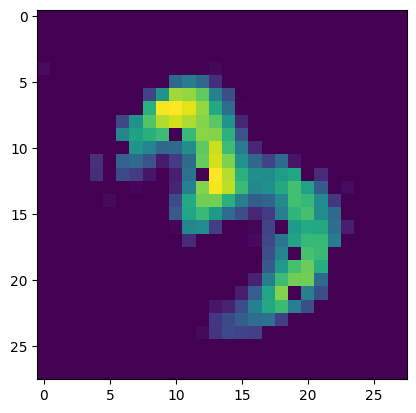

---
tensor(7)
tensor(3.8797)


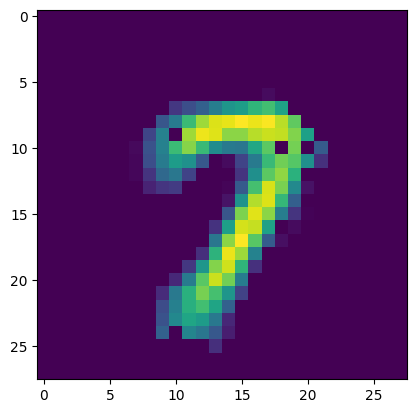

---
tensor(4)
tensor(8.4469)


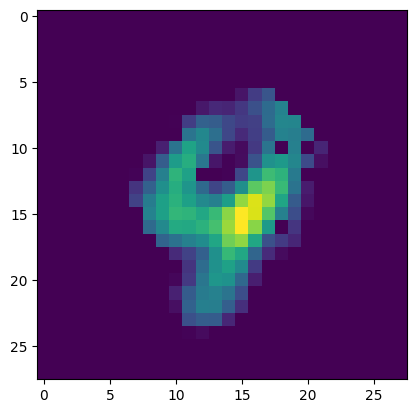

---
tensor(4)
tensor(-39.8388)


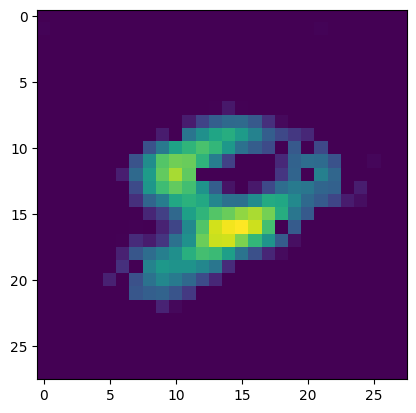

---
tensor(6)
tensor(-37.2419)


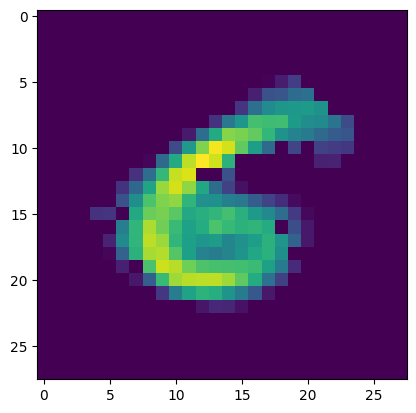

---
tensor(7)
tensor(43.1555)


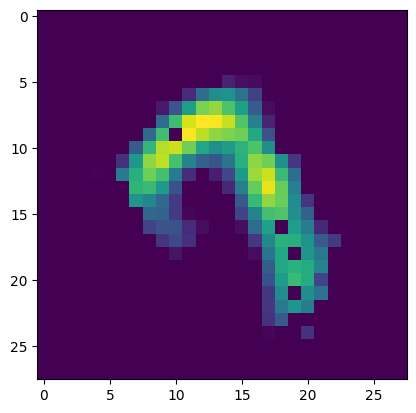

---
tensor(8)
tensor(40.9362)


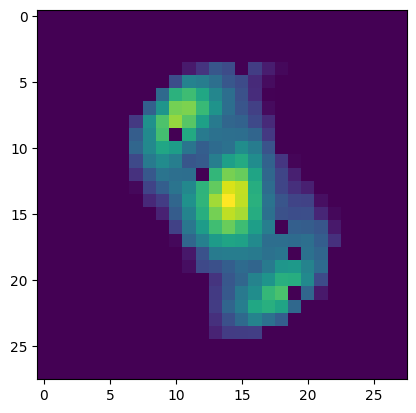

---
tensor(0)
tensor(-2.3820)


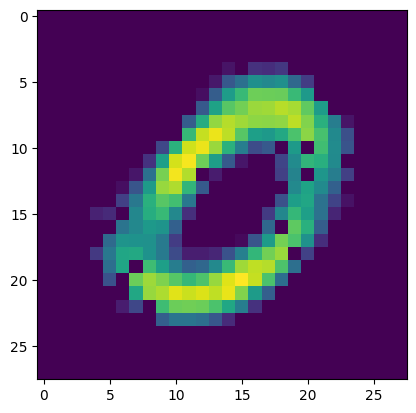

---


In [16]:
# visualise random samples 

for i in range(200, 230):
    print(example_targets[i])
    print(conditional_vector[i][-1]*45)
    plt.imshow(samples[i].detach().numpy())
    plt.show()
    print('---')

In [ ]:
####################################################